# Bussiness Problem
Dream Housing Finance company deals in all kinds of home loans.They have presence across all urban, semi urban and rural areas, Customer first applies for home loan and after that company validates the customer eligibility for loan,\
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount Credit History and others. To automate this process, they have provided a dataset toi identify the customers segments that are eligible for loan amount so that they can specifically target these customers


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load Data
df= pd.read_csv('LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Understanding

In [8]:
df.shape

(614, 13)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df['ApplicantIncome'].sum()

3317724

In [20]:
df['CoapplicantIncome'].sum()

995444.9199886399

In [21]:
df['LoanAmount'].sum()

86676.0

In [22]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [24]:
df['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [25]:
df['Property_Area'].value_counts()


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [26]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [28]:
# As per recuriement create a cloumns
df['Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)


In [29]:
#Drop Unimportant column
df.drop(columns=['Loan_ID'],inplace=True)

In [30]:
continous=['Income','LoanAmount']
Discreate=['Loan_Amount_Term','Dependents']
Discreate_categorical=['Gender','Married','Education',
                       'Self_employed','Credit_History',
                       'Property_Area','Loan_Status']

# Exploration of Data

In [32]:
df[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


In [33]:
df[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

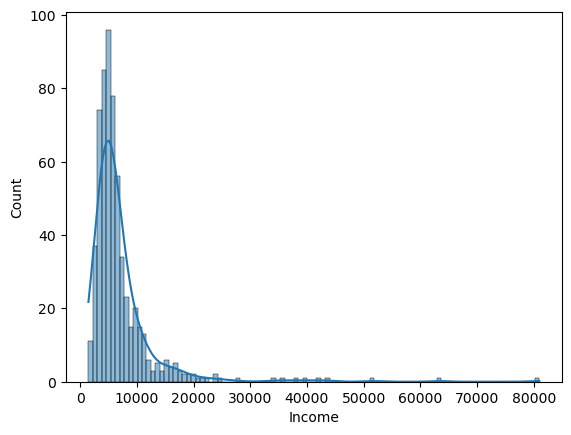

In [34]:
sns.histplot(df['Income'],kde=True)
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Count'>

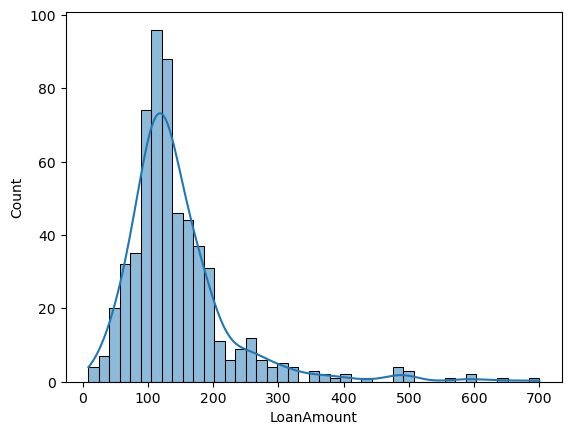

In [35]:
sns.histplot(df['LoanAmount'],kde=True)

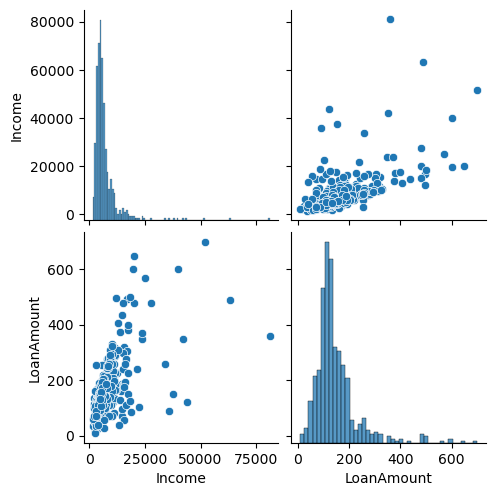

In [36]:
sns.pairplot(df[continous])
plt.show()

In [37]:
df[continous].corr()

,Income,LoanAmount
Income,1.000000,0.624621
LoanAmount,0.624621,1.000000


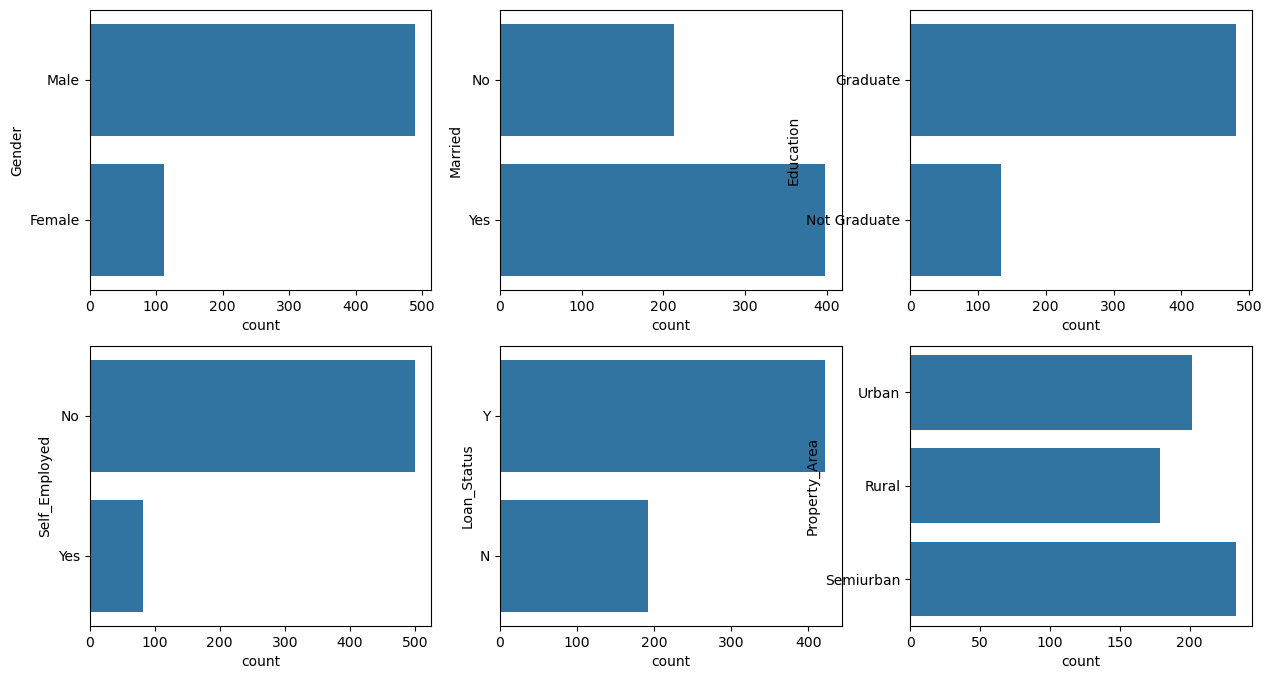

In [38]:
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
sns.countplot(df['Gender'],gap=0,width=0.8)
plt.subplot(2,3,2)
sns.countplot(df['Married'])
plt.subplot(2,3,3)
sns.countplot(df['Education'],)
plt.subplot(2,3,4)
sns.countplot(df['Self_Employed'],)
plt.subplot(2,3,5)
sns.countplot(df['Loan_Status'],)
plt.subplot(2,3,6)
sns.countplot(df['Property_Area'],)
plt.show()
        

In [39]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

**Check Outlier**

<Axes: ylabel='LoanAmount'>

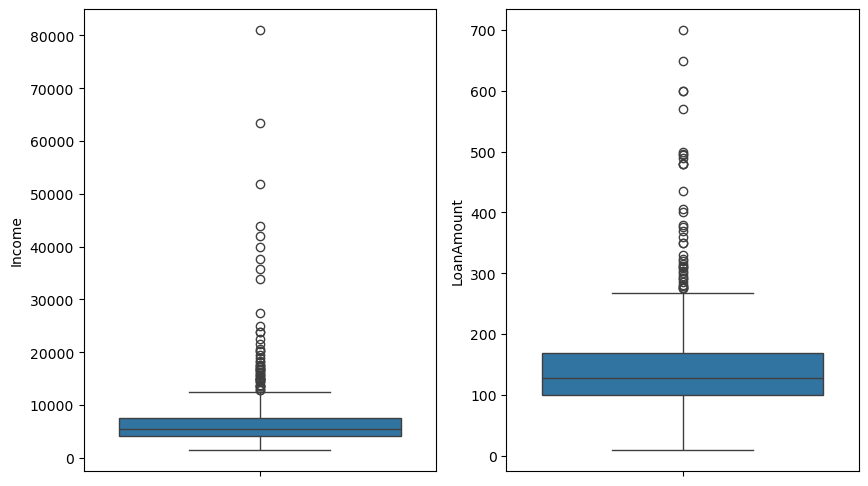

In [41]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.boxplot(df['Income'])
plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

# Step-3: Data prepartion
**1.Data Cleaning**

- **Wrong data treatment**

In [44]:
df['Dependents']= df['Dependents'].replace({'3+':3})
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [45]:
#Missing Values Treatment
df['Dependents']=df['Dependents'].fillna(0)
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df=df.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History'])
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [46]:
#Wrong data type conversion
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')

In [47]:
#Duplicates
df.isnull().sum()
df[df.duplicated()].sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
LoanAmount          0.0
Loan_Amount_Term      0
Credit_History      0.0
Property_Area         0
Loan_Status           0
Income              0.0
dtype: object

**outlier treatment**

In [49]:

#Outlier should be retained (because really some people will have high income)

**Encoding**

In [51]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':2,'Urban':3})
df['Credit_History']=df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

**transformations**

In [53]:
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])
df['LoanAmount'],c=boxcox(df['LoanAmount'])


In [54]:
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12
df['Loan_Amount_Term']

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Loan_Amount_Term, Length: 529, dtype: float64

In [55]:
df.to_excel('Cleaned.xlsx',index=False)

In [56]:
X=df.drop('Loan_Status',axis=1)
Y= df['Loan_Status']


In [57]:
train=[]
cv=[]
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=i)
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(X_train,Y_train)
    Ypred_train=model.predict(X_train)
   
    from sklearn.metrics import r2_score
    train.append(r2_score(Y_train,Ypred_train))
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,X_train,Y_train,cv=5).mean())
    
em=pd.DataFrame({'train': train,'cv':cv})
gm=em[(abs(em['train']-em['cv'])<=0.05)]
rs=gm[gm['cv']==gm['cv'].max()].index.tolist()
print(rs)

[]


**Train_Test_Split**

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=70)

# 1.Logistic Regression

In [61]:
#Modelling
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
#Evaluation
Ypred_train=log_model.predict(X_train)
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(Y_train,Ypred_train))
from sklearn.model_selection import cross_val_score
print('CV Score:',cross_val_score(log_model,X_train,Y_train,cv=5,scoring='accuracy').mean())
#predict & Evaluation on test data
Ypred_test=log_model.predict(X_test)
print('test accuracy:',accuracy_score(Y_test,Ypred_test))

train accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
test accuracy: 0.7830188679245284


In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Ypred_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test,Ypred_test))

[[17 20]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.85      0.46      0.60        37
           1       0.77      0.96      0.85        69

    accuracy                           0.78       106
   macro avg       0.81      0.71      0.72       106
weighted avg       0.80      0.78      0.76       106



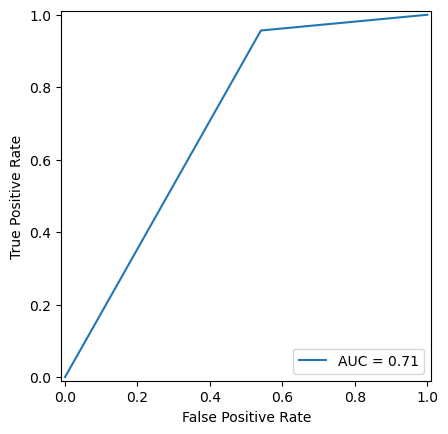

In [63]:

from sklearn.metrics import roc_curve,auc,RocCurveDisplay
# Calculate the ROC curve and AUC
fpr,tpr,thersholds = roc_curve(Y_test,Ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(Y_test,Ypred_test))

AUC Score: 0.7079905992949471


In [65]:
%%timeit
log_model.fit(X_train,Y_train)

10.7 ms ± 68.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 2.KNN
- Hyperparameter tunning
- modelling & Evalution

In [67]:
#hyperparameter tunning
from sklearn.neighbors import  KNeighborsClassifier
estimator =KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,50)),'p':[1,2]}
from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,Y_train)
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1)

In [68]:
#Modelling
knn_model=knn_grid.best_estimator_
knn_model.fit(X_train,Y_train)
#prediction
Ypred_train=knn_model.predict(X_train)
print('Train_accuracy;',accuracy_score(Y_train,Ypred_train))
#crossvalidation
print('CV score:',cross_val_score(knn_model,X_train,Y_train,cv=5,scoring='accuracy').mean())
#test Data
#prediction
Ypred_test = knn_model.predict(X_test)
print('Test Accuracy:',accuracy_score(Y_test,Ypred_test))

Train_accuracy; 0.7659574468085106
CV score: 0.7470028011204481
Test Accuracy: 0.7075471698113207


In [69]:
%%timeit
knn_model.fit(X_train,Y_train)

1.27 ms ± 10.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 3.Supprot Vector Machine(SVM)
- HPT
- modelling & Evalution


In [71]:
#Hyperparameter tunning
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmod','poly']}
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(X_train,Y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [72]:
#Modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(X_train,Y_train)
#Prediction
Ypred_train=svm_model.predict(X_train)
#Evaluation
print('train_accuracy:',accuracy_score(Y_train,Ypred_train))
#crossvalidation
print('CV score:',cross_val_score(svm_model,X_train,Y_train,cv=5,scoring='accuracy').mean())
#test Data
#prediction
Ypred_test = svm_model.predict(X_test)
print('Test Accuracy:',accuracy_score(Y_test,Ypred_test))

train_accuracy: 0.8226950354609929
CV score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


In [73]:
%%timeit
svm_model.fit(X_train,Y_train)

3.05 ms ± 20.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 4.Decision Tree Classifier

- HPT
- identify important features by  using  feature selection
- modelling & Evalution




In [76]:
# for maximum depth to find dT model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=True)

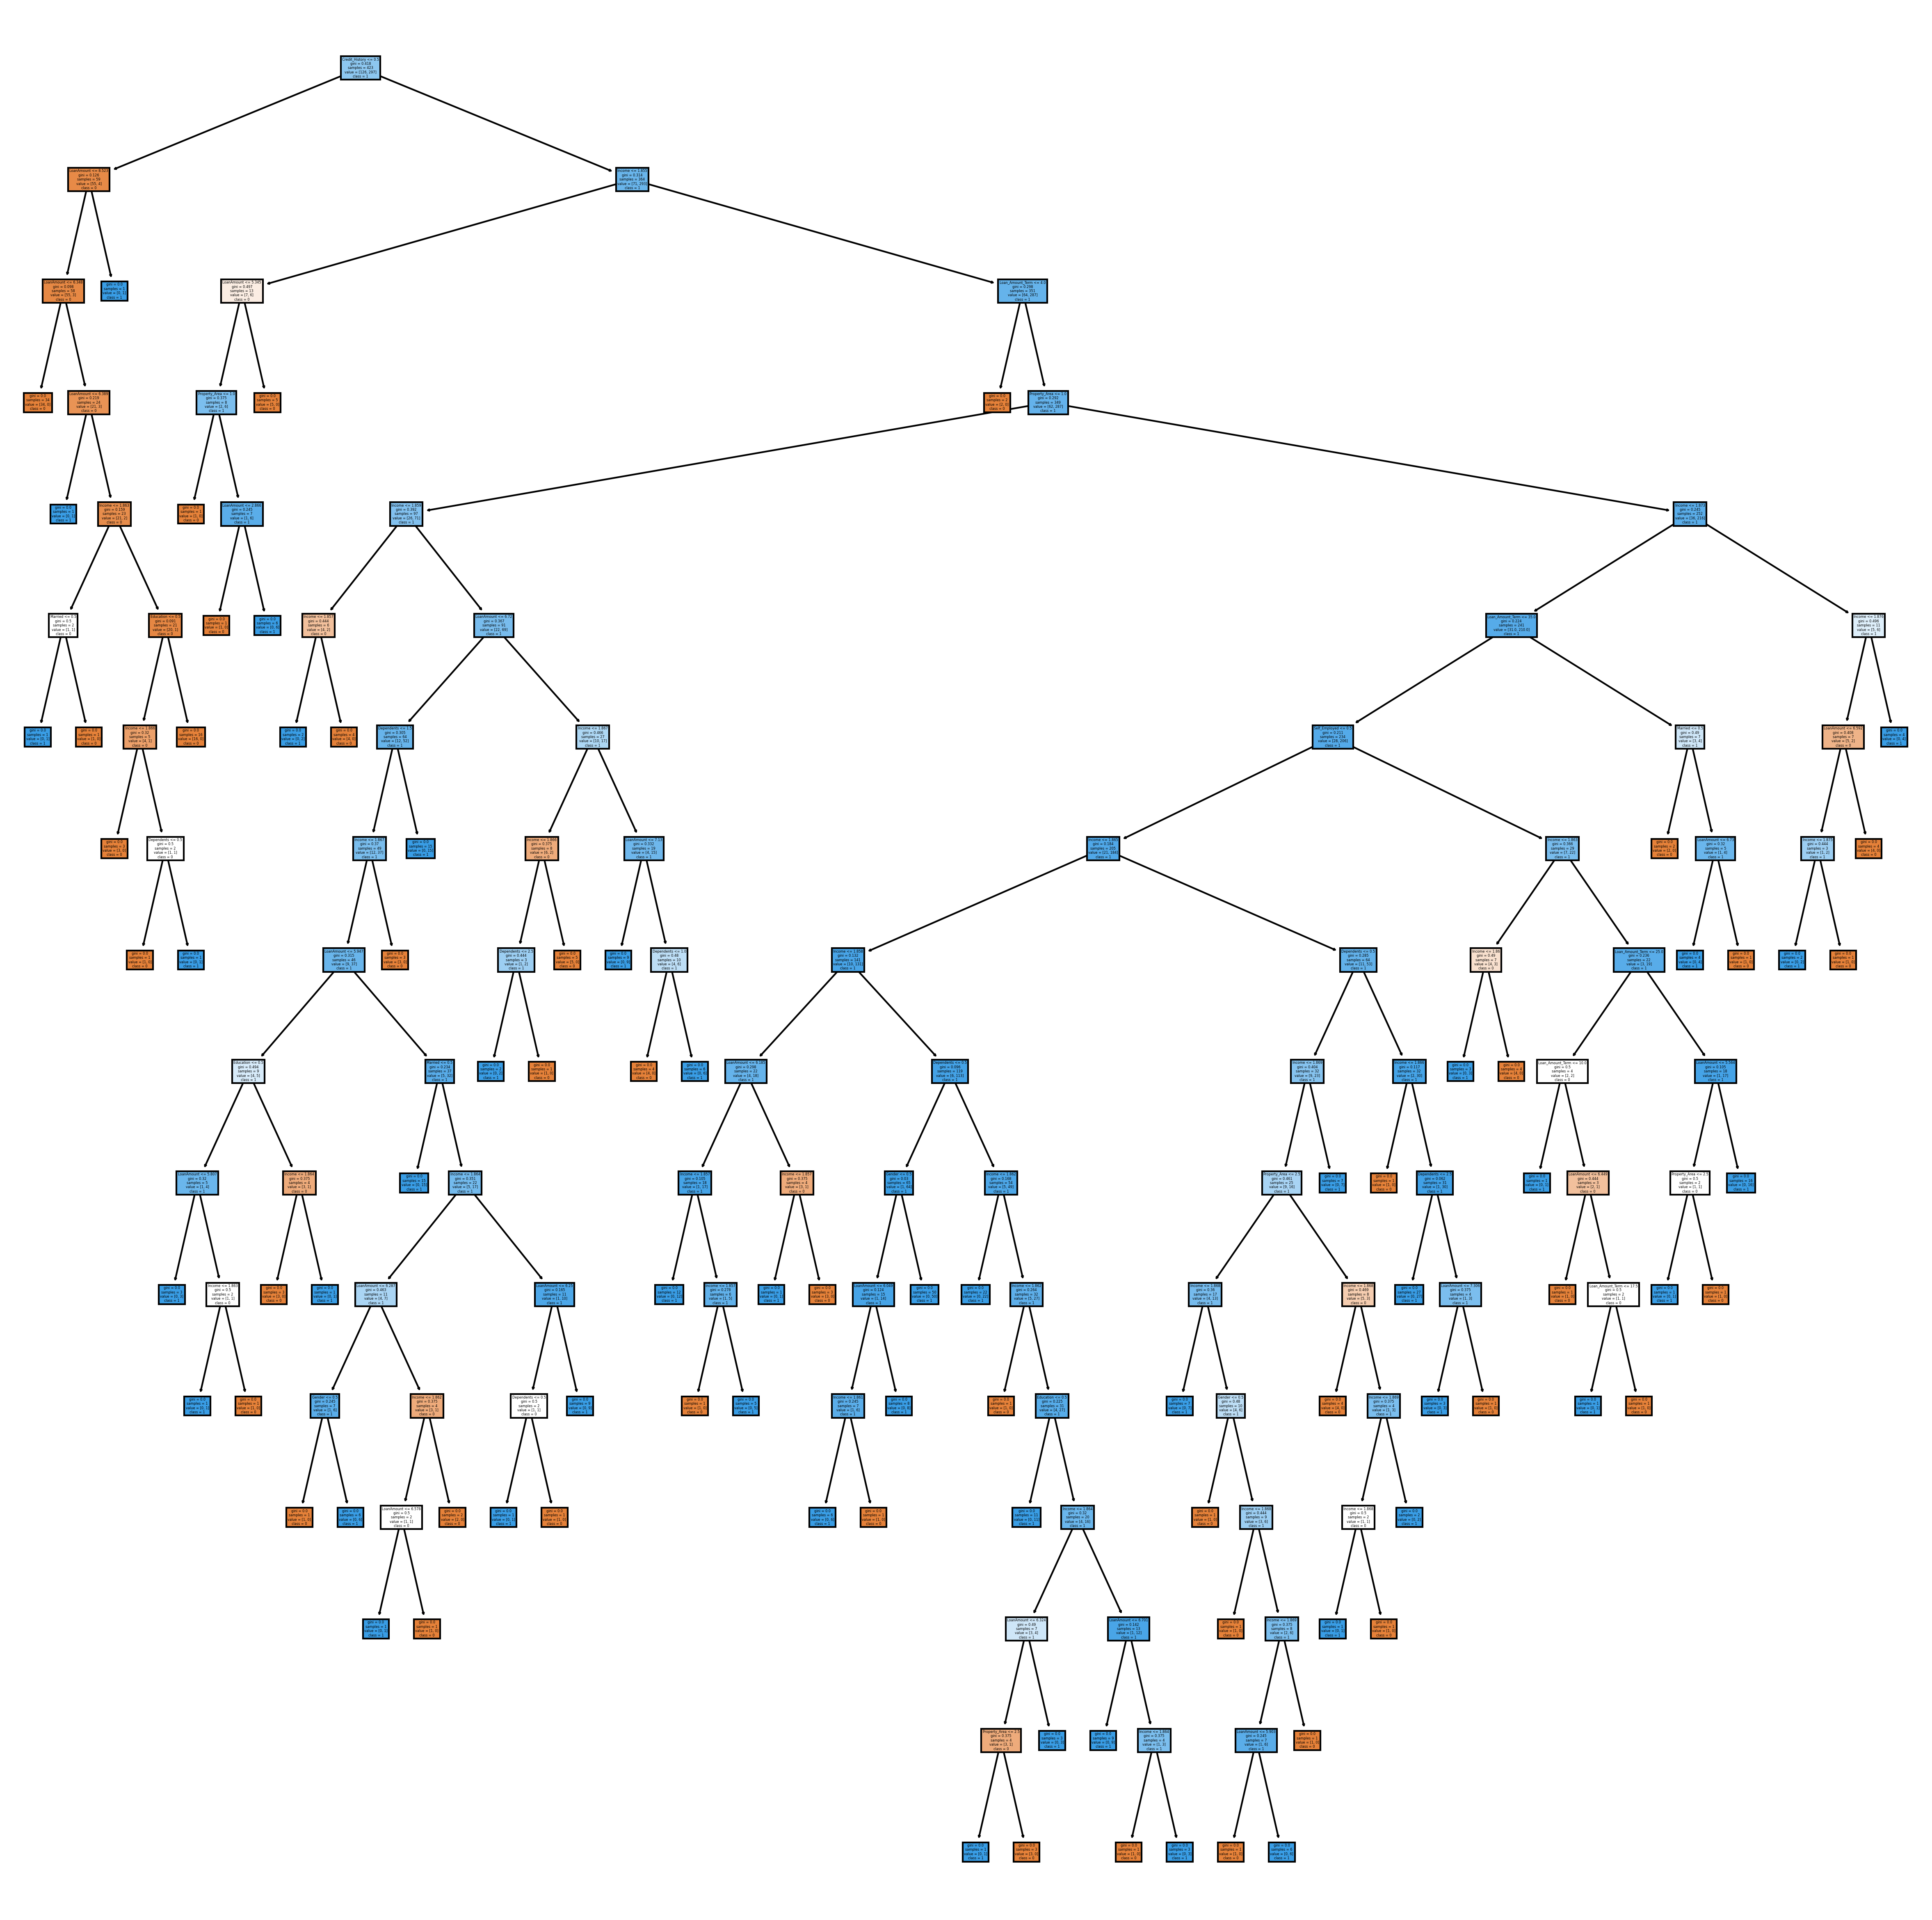

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),class_names=['0','1'])
plt.show()

In [78]:
#Hyperparameter tunning
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier(random_state=True)
param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,16))}
dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,Y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=True)

In [79]:
#Important features
feats_ab=pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Importance'])
feats_ab
important_features_dt= feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['Credit_History']

**Creating Decisio Tree Model with important parameters and important features**

In [81]:
#selection train & test data
X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

#Modelling
dt=dt_grid.best_estimator_
dt.fit(X_train_dt,Y_train)
#Evaluation
Ypred_train=dt.predict(X_train_dt)
Ypred_test=dt.predict(X_test_dt)
print('train accuracy:',accuracy_score(Y_train,Ypred_train))
print('cv score:',cross_val_score(dt,X_train_dt,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(Y_test,Ypred_test))

train accuracy: 0.8226950354609929
cv score: 0.8227731092436976
test accuracy: 0.7830188679245284


In [82]:
%%timeit
dt.fit(X_train_dt,Y_train)

1.06 ms ± 7.49 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# 5.Random Forest Classifier

- HPT
- Important features
- modelling
- evaluation

In [85]:
#Hyperparameter
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,51))}
rfc_grid =GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rfc_grid.fit(X_train,Y_train)
rf=rfc_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=50, random_state=True)

In [86]:
#Important features
imp_feat=pd.DataFrame(data=rf.feature_importances_,index=X.columns,columns=['Importance'])
important_feature_rf = imp_feat[imp_feat['Importance']>0].index.tolist()
important_feature_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [87]:
X_train_rf=X_train[important_feature_rf]
X_test_rf=X_test[important_feature_rf]
#Modelling
rf=rfc_grid.best_estimator_
rf.fit(X_train_rf,Y_train)
#Evaluation
Ypred_train=rf.predict(X_train_rf)
Ypred_test=rf.predict(X_test_rf)
print('train accuracy:',accuracy_score(Y_train,Ypred_train))
print('cv score:',cross_val_score(rf,X_train_rf,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(Y_test,Ypred_test))

train accuracy: 1.0
cv score: 0.8227450980392158
test accuracy: 0.7641509433962265


In [88]:
%%timeit
rf.fit(X_train_rf,Y_train)

57.3 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 6.AdaBoost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,51))}
ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,Y_train)
ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=3, random_state=True)

In [91]:
# Important features
feats_ab= pd.DataFrame(data= ab.feature_importances_,index=X.columns,columns=['Importance'])
important_features_ab=feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Credit_History', 'Property_Area', 'Income']

In [92]:
X_train_ada=X_train[important_features_ab]
X_test_ada=X_test[important_features_ab]
#Modelling
ab=ab_grid.best_estimator_
ab.fit(X_train_ada,Y_train)
#Evaluation
YPred_train=ab.predict(X_train_ada)
Ypred_test=ab.predict(X_test_ada)
print('train accuracy:',accuracy_score(Y_train,Ypred_train))
print('cv score:',cross_val_score(ab,X_train_ada,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy:',accuracy_score(Y_test,Ypred_test))

train accuracy: 1.0
cv score: 0.8298879551820729
test accuracy: 0.7641509433962265


In [93]:
%%timeit
ab.fit(X_train_ada,Y_train)

4.43 ms ± 43.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 7.Gradient boost classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={'n_estimators':list(range(1,10)),
            'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,Y_train)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.6, n_estimators=7, random_state=True)

In [96]:
feats_gb= pd.DataFrame(data= gb.feature_importances_,index=X.columns,columns=['Importance'])
important_features_gb=feats_gb[feats_gb['Importance']>0].index.tolist()
important_features_gb

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [97]:
X_train_gb=X_train[important_features_gb]
X_test_gb=X_test[important_features_gb]
gb=gb_grid.best_estimator_
gb.fit(X_train_gb,Y_train)
Ypred_train=gb.predict(X_train_gb)
Ypred_test= gb.predict(X_test_gb)
print('Trainaccuracy:',accuracy_score(Y_train,Ypred_train))
print('CV score:',cross_val_score(gb,X_train_gb,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy;',accuracy_score(Y_test,Ypred_test))

Trainaccuracy: 0.8747044917257684
CV score: 0.8228011204481793
test accuracy; 0.7358490566037735


In [98]:
%%timeit
gb.fit(X_train_gb,Y_train)

7.57 ms ± 20.3 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# XGBOOST

In [100]:
from xgboost import XGBClassifier
estimator= XGBClassifier()
param_grid={'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(X_train,Y_train)
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
print("Best parameters:", xgb_grid.best_params_)

Best parameters: {'gamma': 0.3, 'max_depth': 4, 'n_estimators': 10}


In [102]:
#print("Best accuracy score:", xgb_grid.best_score_)

In [103]:
feats_xgb= pd.DataFrame(data= xgb.feature_importances_,index=X.columns,columns=['Importance'])
important_features_xgb=feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [104]:
X_train_xgb=X_train[important_features_xgb]
X_test_xgb=X_test[important_features_xgb]
xgb=xgb_grid.best_estimator_
xgb.fit(X_train_xgb,Y_train)
Ypred_train=xgb.predict(X_train_xgb)
Ypred_test= xgb.predict(X_test_xgb)
print('Trainaccuracy:',accuracy_score(Y_train,Ypred_train))
print('CV score:',cross_val_score(xgb,X_train_xgb,Y_train,cv=5,scoring='accuracy').mean())
print('test accuracy;',accuracy_score(Y_test,Ypred_test))

Trainaccuracy: 0.8557919621749409
CV score: 0.8275070028011206
test accuracy; 0.7735849056603774


In [105]:
%%timeit
xgb.fit(X_train_xgb,Y_train)

8.14 ms ± 143 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Save the Best Model

In [107]:
from joblib import dump
dump(dt,'loan_prediction_model.joblib')

['loan_prediction_model.joblib']

In [108]:
from pickle import dump
dump(dt,open('loan_prediction_model.pkl','wb'))

# Predict on New data

In [110]:
input_data={'Loan_ID':'LP002341',
            'Gender':'Male',
             'Married':'No',
            'Dependents':1,
            'Education':'Graduate',
            'Self_Employed':'yes',
            'ApplicantIncome':100,
            'CoapplicantIncome':0,	
             'LoanAmount':10000,
            'Loan_Amount_Term':360,
            'Credit_History':'Good',
             'Property_Area':'Urban',
           'Loan_Status':'Y'}

In [111]:
df= pd.DataFrame(input_data,index=[0])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002341,Male,No,1,Graduate,yes,100,0,10000,360,Good,Urban,Y


**apply Data Preporocessing on unknown data**

In [113]:
#Drop Unimportant column
df.drop(columns=['Loan_ID'],inplace=True)
# As per recuriement create a cloumns
df['Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)
df['Dependents']= df['Dependents'].replace({'3+':3})
#Missing Values Treatment
df['Dependents']=df['Dependents'].fillna(0)
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df=df.dropna(subset=['LoanAmount','Loan_Amount_Term','Credit_History'])
#Wrong data type conversion
df['Dependents']=df['Dependents'].astype('int')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})
df['Married']=df['Married'].replace({'Yes':1,'No':0})
df['Education']=df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':2,'Urban':3})
df['Credit_History']=df['Credit_History'].replace({'Good':1,'bad':0})
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})
X_new=df


In [114]:
#select important features of your best model
X_new=df[important_features_dt]
dt.predict(X_new)

array([1], dtype=int64)